In [403]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class FindOriginalBall:
    # make a better name lol
    # test this with images with more noise in it
    def __init__(self, img):
        self.img = cv2.imread(img)
        self.gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)

    def _find_ellipses(self, threshold = 0):
        
        # Threshold the image set between 0(high tolerance) and 255(low tolerance) 255 makes it harder to find elipses
        ret, thresh = cv2.threshold(self.gray, threshold, 255, 0)
        
        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Check if contours are found
        if len(contours) != 0:
            # Iterate through contours
            for cont in contours:
                if len(cont) < 5:
                    break
                # Fit ellipse to contour
                ellipse = cv2.fitEllipse(cont)
                return ellipse  # Return the first fitted ellipse
        return None
    
    def _find_endpoints(self,center, axes, angle):
        # Unpack center coordinates
        centerx, centery = center
        # Unpack semi-major and semi-minor axes lengths
        a, b = axes
        # Convert angle to radians
        angle_rad = np.deg2rad(angle)
        
        # Calculate coordinates of major axis endpoints
        x1 = centerx + a/2 * np.cos(angle_rad)
        y1 = centery - a/2 * np.sin(angle_rad)
        x2 = centerx - a/2 * np.cos(angle_rad)
        y2 = centery + a/2 * np.sin(angle_rad)
        
        return (x1, y1), (x2, y2)

    def _find_circle(self, endpoints, radius):
        endpoint1, endpoint2 = endpoints
        midpoint = ((endpoint1[0] + endpoint2[0]) / 2, (endpoint1[1] + endpoint2[1]) / 2)
        dx = (endpoint2[0] - endpoint1[0]) / np.linalg.norm(np.array(endpoint2) - np.array(endpoint1))
        dy = (endpoint2[1] - endpoint1[1]) / np.linalg.norm(np.array(endpoint2) - np.array(endpoint1))
        
        # Calculate circle centers
        center1 = (midpoint[0] + radius * dx, midpoint[1] + radius * dy)
        center2 = (midpoint[0] - radius * dx, midpoint[1] - radius * dy)
        
        return center1, center2


    def _create_ellipse(self, ellipse):
        # Draw ellipse on image
        img_with_ellipse = cv2.ellipse(self.img.copy(), ellipse, (0, 255, 0), 2)
        
        # Get center coordinates of the ellipse
        center = (int(ellipse[0][0]), int(ellipse[0][1]))
        
        # Draw black dot at the center
        cv2.circle(img_with_ellipse, center, 5, (0, 0, 0), -1)  # -1 to fill the circle
        
        return img_with_ellipse
    
    def _create_circle(self, circle):
        # Create a blank image to draw the circle
        img_with_circle = self.img.copy()
        
        # Draw circle on the blank image
        print(circle[1])

        cv2.circle(img_with_circle, circle[0], circle[1], (0, 255, 0), 2)
        
        # Get center coordinates of the circle
        center = circle[0]
        
        # Draw black dot at the center
        cv2.circle(img_with_circle, center, 5, (0, 0, 0), -1)  # -1 to fill the circle
        
        return img_with_circle
    

    def graph_to_original(self, v=(1,1)):

        # Find ellipse
        ellipse = self._find_ellipses()
        print(v)
        circle = self.calculate_original(ellipse,v)

        # Draw ellipse on original image
        if ellipse is not None:
            img_with_ellipse = self._create_ellipse(ellipse)
            self.img = img_with_ellipse
            print(circle)
            fin_image = self._create_circle(circle)

            # Convert BGR image to RGB (matplotlib uses RGB)
            fin_image_rgb = cv2.cvtColor(fin_image, cv2.COLOR_BGR2RGB)

            # Display the image with ellipse using matplotlib
            plt.imshow(fin_image)
            plt.axis('off')  # Turn off axis
            plt.show()
        else:
            print("No ellipse found.")
    

    def calculate_original(self, ellipse = None, v=(1,1)):
        if not ellipse:
            ellipse = self._find_ellipses()
        if ellipse:
            x1, y1 = ellipse[0]
            alpha = 90 - ellipse[2] # switch to x axis
            s,l = ellipse[1]
            x2 = x1 + (l-1.5*s)*np.cos(np.radians(alpha)) * v[0]
            y2 = y1 + (l-1.5*s)*np.sin(np.radians(alpha)) * -v[1]
            # equations were found on paper 5
            

            print(f"x1: {x1}\ny1: {y1}\nl: {l}\ns: {s}\nα: {alpha}\n\nx2: {x2}\ny2: {y2}")
            return ((int(x2),int(y2)),int(s/2))
        return (0,0),0



In [404]:
oval = FindOriginalBall('oval.png')

In [405]:
oval.calculate_original()

x1: 399.4985046386719
y1: 199.5001220703125
l: 802.0917358398438
s: 401.2516784667969
α: -6.866455078125e-05

x2: 599.7127227781765
y2: 199.50036201153443


((599, 199), 200)

In [406]:
oval._find_endpoints((400,200),(800,400),0)

((800.0, 200.0), (0.0, 200.0))

In [407]:
oval._find_circle(((800.0, 200.0), (0.0, 200.0)), 200)

((200.0, 200.0), (600.0, 200.0))

(1, -1)
x1: 399.4985046386719
y1: 199.5001220703125
l: 802.0917358398438
s: 401.2516784667969
α: -6.866455078125e-05

x2: 599.7127227781765
y2: 199.49988212909057
((599, 199), 200)
200


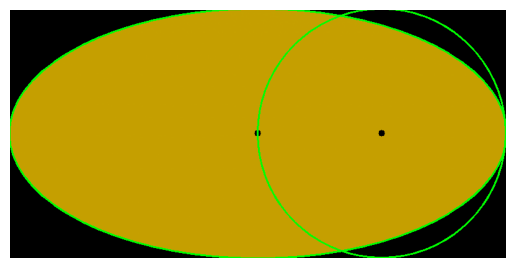

In [396]:
oval.graph_to_original(v=(1,-1))

In [347]:
400 + (800-2*400)*np.cos(0)

400.0

In [348]:
test = FindOriginalBall('black.png')

(-1, -1)
x1: 97.41670227050781
y1: 96.02039337158203
l: 112.1022720336914
s: 58.799468994140625
α: 16.740463256835938

x2: 74.5266620960741
y2: 102.90535862634768
((74, 102), 29)
29


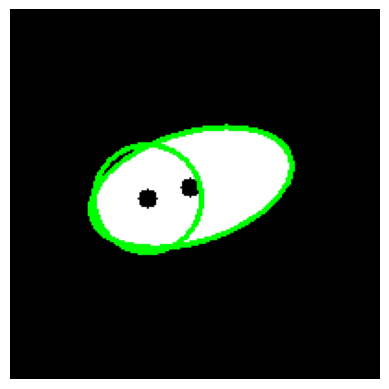

In [359]:
test.graph_to_original(v=(-1,-1))

In [350]:
96 + (112-58) * np.sin(np.radians(16))

110.88441721411796

In [351]:
test.calculate_original()

x1: 97.41670227050781
y1: 96.02039337158203
l: 112.1022720336914
s: 58.799468994140625
α: 16.740463256835938

x2: 120.30674244494152
y2: 89.13542811681639


((120, 89), 29)

(1, 1)
x1: 97.75200653076172
y1: 98.69216918945312
l: 134.42282104492188
s: 45.867095947265625
α: 41.102699279785156

x2: 147.20044457297462
y2: 55.55144474395802
((147, 55), 22)
22


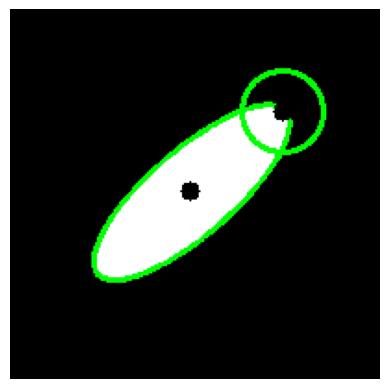

In [408]:
test2 = FindOriginalBall('black2.png')
test2.graph_to_original(v=(1,1))

In [409]:
test2._find_endpoints((97,98),(134,46),41)

((147.5655418749257, 54.04404505763601),
 (46.43445812507427, 141.95595494236397))

In [411]:
test2._find_circle(((147.5655418749257, 54.04404505763601),
 (46.43445812507427, 141.95595494236397)),11)

((88.6981946175495, 105.21664931889558),
 (105.3018053824505, 90.78335068110442))

In [502]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class FindOriginal2:
    def __init__(self, imglink):
        self.img = cv2.imread(imglink)
        self.gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
    
    def _find_ellipses(self, threshold=0):
        # Threshold the image set between 0 (high tolerance) and 255 (low tolerance)
        # 255 makes it harder to find ellipses
        ret, thresh = cv2.threshold(self.gray, threshold, 255, 0)
        
        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Check if contours are found
        if len(contours) != 0:
            # Iterate through contours
            for cont in contours:
                if len(cont) < 5:
                    break
                # Fit ellipse to contour
                ellipse = cv2.fitEllipse(cont)
                return ellipse, cont  # Return the first fitted ellipse and its contour
        return None, None
    
    def _find_endpoints(self):
        ellipse, _ = self._find_ellipses()
        if ellipse is None:
            return None
        
        # Unpack center coordinates
        centerx, centery = ellipse[0]
        # Unpack semi-major and semi-minor axes lengths
        a, _ = ellipse[1]

        # Convert angle to radians
        print(90-ellipse[2])
        angle_rad = np.deg2rad(90-ellipse[2])
        print(angle_rad)
        
        # Calculate coordinates of major axis endpoints
        x1 = centerx + a  * np.cos(angle_rad)
        y1 = centery - a * np.sin(angle_rad)
        x2 = centerx - a  * np.cos(angle_rad)
        y2 = centery + a  * np.sin(angle_rad)
        
        return (x1, y1), (x2, y2)

    def visualize_endpoints_contour(self):
        endpoints = self._find_endpoints()
        if endpoints is None:
            print("No ellipse found")
            return
        
        ellipse, contour = self._find_ellipses()
        if ellipse is None:
            print("No ellipse found")
            return
        
        # Plot the image
        plt.imshow(cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB))
        
        # Draw the contour of the ellipse
        contour = np.squeeze(contour)  # Reduce dimensionality
        plt.plot(contour[:, 0], contour[:, 1], color='blue', linewidth=2)
        plt.scatter(ellipse[0][0], ellipse[0][1], c='green', s=20)  # Draw green dot
        
        # Draw circles at the endpoints
        for endpoint in endpoints:
            plt.scatter(endpoint[0], endpoint[1], c='red', s=20)  # Draw red dots
        
        plt.show()


In [509]:
test3 = FindOriginal2("black.png")

16.740463256835938
0.29217620214092027


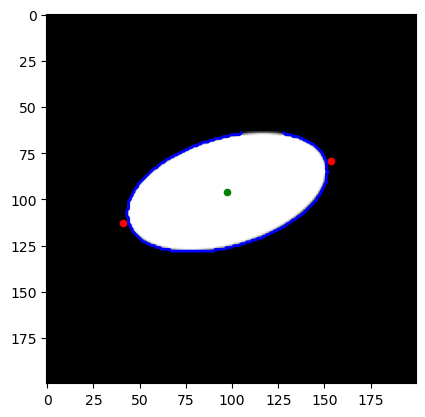

In [510]:
test3.visualize_endpoints_contour()